In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.ELM import ExtremeLearningMachine, load_results, save_results
import matplotlib.pyplot as plt


In [7]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

layers_list = [
    [10, 1000],
    [10, 2000],
    [10, 5000],
    [10, 8000],
]
torch.set_grad_enabled(False)

alpha_list = [0.01, 0.05, 0.1, 0.5]
function_list = ['LeakyRelu', 'Sigmoid']

HP_list = itertools.product(layers_list, alpha_list, function_list)
results = []
for HyperParam in HP_list:
    layers, alpha, activation_f = HyperParam

    EML_model = ExtremeLearningMachine(layers, alpha, activation_f)

    res = kFoldCross(EML_model.fit, EML_model.predict, X_dev, Y_dev, 5, out_scaler=True)
    res = len(layers)-1,  layers[1], alpha, activation_f, res[0], res[1], res[3]
    results.append(res)

columns=['n_layers', 'size', 'alpha', 'activation_f', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)
# save results
save_results(df)
# load all saved results
df = load_results()



In [8]:
# load all saved results
df = load_results()
df.sort_values(by=['MEE_mean'])

,n_layers,size,alpha,activation_f,MEE_mean,MEE_std,seconds
13,1,8000,0.050000,LeakyRelu,3.019734,0.155371,10.162159
9,1,5000,0.050000,LeakyRelu,3.040678,0.156197,10.324484
12,1,8000,0.010000,LeakyRelu,3.050389,0.137124,10.198512
5,1,2000,0.050000,LeakyRelu,3.067192,0.167496,6.346691
14,1,8000,0.100000,LeakyRelu,3.073286,0.135992,9.889177
10,1,5000,0.100000,LeakyRelu,3.076580,0.127287,8.991834
8,1,5000,0.010000,LeakyRelu,3.084991,0.142402,9.759601
6,1,2000,0.100000,LeakyRelu,3.099157,0.135407,6.319895
1,1,1000,0.050000,LeakyRelu,3.132894,0.136254,4.139578
2,1,1000,0.100000,LeakyRelu,3.159418,0.144264,3.915390


' '

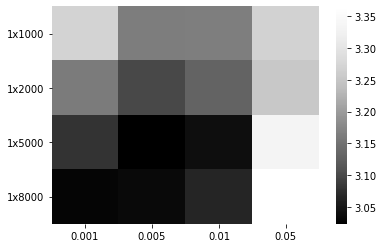

In [30]:
df2 = df.loc[df['activation_f'] == 'LeakyRelu']
df2 = df2.sort_values(by=['n_layers', 'size', 'alpha'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 4)
yticklabels = ['1x1000', '1x2000', '1x5000', '1x8000']
sns.heatmap(array, xticklabels=alpha_list, yticklabels=yticklabels,cmap='Greys_r')
plt.yticks(rotation=0)
' '



' '

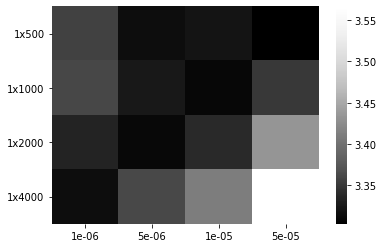

In [10]:
df2 = df.loc[df['activation_f'] == 'Sigmoid']
df2 = df2.sort_values(by=['n_layers', 'size', 'alpha'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 4)
yticklabels = ['1x500', '1x1000', '1x2000', '1x4000']
sns.heatmap(array, xticklabels=alpha_list, yticklabels=yticklabels,cmap='Greys_r')
plt.yticks(rotation=0)
' '

In [10]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

layers_list = [
    [10, 8000]
]
torch.set_grad_enabled(False)

alpha_list = alpha = np.linspace(0.001, 0.3, 20)
function_list = ['LeakyRelu']

HP_list = itertools.product(layers_list, alpha_list, function_list)
results = []
for HyperParam in HP_list:
    layers, alpha, activation_f = HyperParam

    EML_model = ExtremeLearningMachine(layers, alpha, activation_f)

    res = kFoldCross(EML_model.fit, EML_model.predict, X_dev, Y_dev, 5, out_scaler=True)
    res = len(layers)-1,  layers[1], alpha, activation_f, res[0], res[1], res[2], res[3]
    results.append(res)

columns=['n_layers', 'size', 'alpha', 'activation_f', 'MEE_Val_mean', 'MEE_Val_std', 'MEE_Tr_mean', 'seconds']
df = pd.DataFrame(results, columns=columns)

,n_layers,size,alpha,activation_f,MEE_Val_mean,MEE_Val_std,MEE_Tr_mean,seconds
1,1,8000,0.016737,LeakyRelu,3.007069,0.131338,2.550472,15.291219


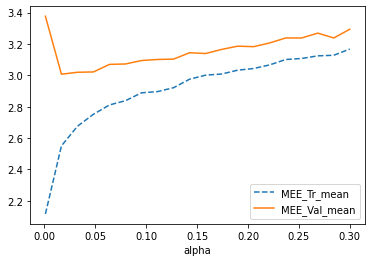

In [12]:
ax = df.plot(x='alpha', y='MEE_Tr_mean', linestyle='--')
df.plot(ax=ax,x='alpha', y='MEE_Val_mean')
df.sort_values(by=['MEE_Val_mean']).head(1)